# Case Study #04 - ANOVA

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df=pd.read_csv(r'Desktop\ICTK\Case Study #04 - ANOVA\Sales_data_zone_wise.csv')

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### ● Qn. 1. The mean sales generated by each zone.

In [6]:
df1=df.describe()
print('Statistical description of Zones;\n\n', round(df1,2))

Statistical description of Zones;

          Zone - A    Zone - B    Zone - C    Zone - D
count       29.00       29.00       29.00       29.00
mean   1540493.14  1755559.59  1772871.03  1842926.76
std     261940.06   168389.89   333193.72   375016.48
min    1128185.00  1527574.00  1237722.00  1234311.00
25%    1305972.00  1606010.00  1523308.00  1520406.00
50%    1534390.00  1740365.00  1767047.00  1854412.00
75%    1820196.00  1875658.00  2098463.00  2180416.00
max    2004480.00  2091194.00  2290580.00  2364132.00


In [7]:
df2=df.mean()
print('Mean sales for each zone=\n\n',round(df2,3))

Mean sales for each zone=

 Zone - A    1540493.138
Zone - B    1755559.586
Zone - C    1772871.034
Zone - D    1842926.759
dtype: float64


### ● Qn. 2. Total sales generated by all the zones for each month.

In [8]:
df3=df.sum(axis=1)
df_col = pd.concat([df.Month,df3], axis=1)
dfcol = df_col.rename({0: 'Total sales'}, axis='columns') 
print("The sum of sales for each month is:")
dfcol

The sum of sales for each month is:


,Month,Total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


Text(0, 0.5, 'Total sales')

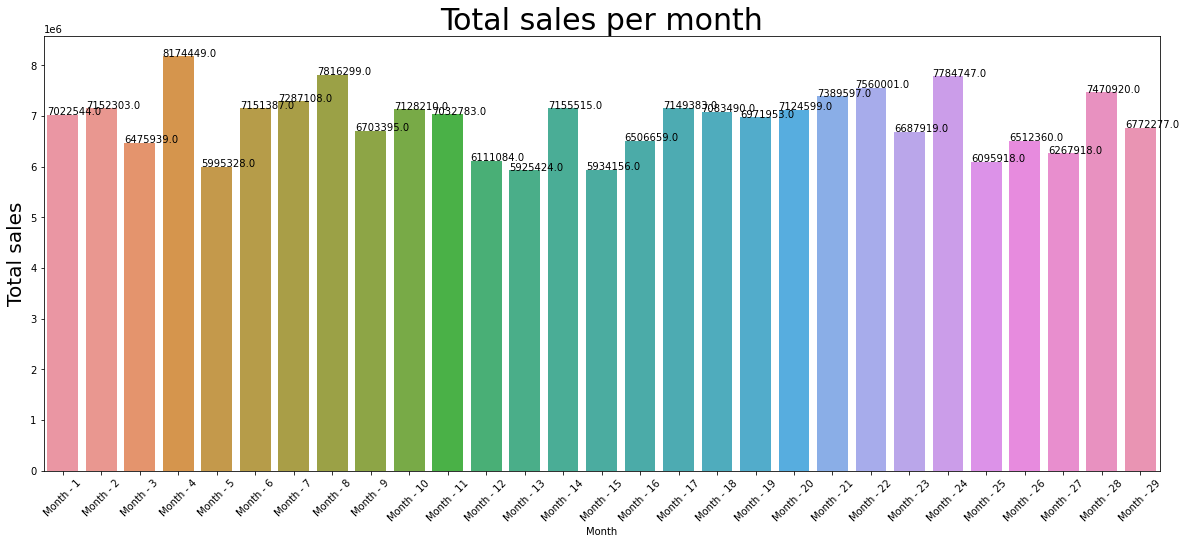

In [9]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
graph=sns.barplot(x='Month',y='Total sales',data=dfcol)
plt.title('Total sales per month',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.3))
plt.ylabel("Total sales",fontsize=20)

### ● Qn. 3. Check whether all the zones generate the same amount of sales

# Implementing one way ANOVA



In [10]:
a=df['Zone - A']
b=df['Zone - B']
c=df['Zone - C']
d=df['Zone - D']
fvalue, pvalue = f_oneway(a, b, c,d)
fvalue, pvalue
print("The f value is; ", round(fvalue,6))
print("The p value is; ", round(pvalue,6))

The f value is;  5.672056
The p value is;  0.001183


In [11]:
df_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
df_melt.columns = ['Month', 'Zone', 'Profit']
df_melt.head()

,Month,Zone,Profit
0,Month - 1,Zone - A,1483525
1,Month - 2,Zone - A,1238428
2,Month - 3,Zone - A,1860771
3,Month - 4,Zone - A,1871571
4,Month - 5,Zone - A,1244922


In [12]:
# Ordinary Least Squares (OLS) model

model = ols('Profit~C(Zone)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Zone),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


#### Insight;

The p value obtained from ANOVA analysis is lower than the alpha (p < 0.05), and therefore, we reject the null hypothesis and conclude that Sales of all the zones are significantly different